# Part III

# Black-Scholes: hedging simulations (30 pts.)

## Question 1

Black-Scholes formula:
\begin{align*}
    C_t &= S_tN(d_1) - e^{-rτ}KN(d_2)
\end{align*}
where
\begin{align*}
    d_1 &= \frac{\text{log}\bigl(\frac{S_t}{K}\bigr) + \bigl(r + \frac{1}{2}σ^2\bigr)τ}{σ\sqrt{τ}} \\
    d_2 &= d_1 - σ\sqrt{τ}
\end{align*}

We are looking to find $\frac{∂C_t}{∂S_t}$. For this, we first derive:
\begin{align*}
    \frac{∂d_1}{∂S_t} &= \frac{∂}{∂S_t}\biggl(\frac{1}{σ\sqrt{τ}}\text{log}\biggl(\frac{S_t}{K}\biggr)\biggr) \\
    &= \frac{1}{σ\sqrt{τ}}\biggl(\frac{∂}{∂S_t}\biggl(\text{log}(S_t) - \text{log}(K)\biggr)\biggr) \\
    &= \frac{1}{σ\sqrt{τ}}\biggl(\frac{∂}{∂S_t}\text{log}(S_t)\biggr) \\
    &= \frac{1}{σ\sqrt{τ}} \frac{1}{S_t} \\
    &= \frac{1}{S_tσ\sqrt{τ}}
\end{align*}

With the second term of $d_2$ containing no $S_t$, we can state:

\begin{equation*}
    \frac{∂d_1}{∂S_t} = \frac{∂d_2}{∂S_t} = \frac{1}{S_tσ\sqrt{τ}}
\end{equation*}

The first part of differentiating the Black Scholes formula (with $n(x)$ the standard normal pdf):

\begin{align*}
    \frac{∂C_t}{∂S_t} &= S_t \frac{∂}{∂S_t} N(d_1) + N(d_1) \frac{∂S_t}{∂S_t} - e^{-rτ}K \frac{∂}{∂S_t} N(d_2) & \text{(productrule)}\\
    &= N(d_1) + S_t n(d_1) \frac{∂d_1}{∂S_t} - e^{-rτ}K n(d_2) \frac{∂d_2}{∂S_t} & \text{(chainrule)}\\
    &= N(d_1) + \frac{n(d_1)}{σ\sqrt{τ}} \biggl( 1 - \frac{n(d_2)}{n(d_1)} \frac{K}{e^{rτ}} \frac{σ\sqrt{τ}}{S_tσ\sqrt{τ}} \biggr) & \text{(use $\frac{∂d_1}{∂S_t}$ and $\frac{∂d_2}{∂S_t}$)} \\
    &= N(d_1) + \frac{n(d_1)}{σ\sqrt{τ}} \biggl( 1 - \frac{n(d_2)}{n(d_1)} \frac{K}{S_te^{rτ}} \biggr) & \text{(simplify)}
\end{align*}

To continue, we first derive $d_1^2 - d_2^2$ and with that $\frac{n(d_2)}{n(d_1)}$:

\begin{align*}
    d_1^2 - d_2^2 &= d_1^2 - (d_1 - σ\sqrt{τ})^2 \\
    &= d_1^2 - d_1^2 + 2 d_1 σ\sqrt{τ} - (σ\sqrt{τ})^2 \\
    &= 2 d_1 σ\sqrt{τ} - σ^2τ \\
    &= 2 \biggl[ \text{log}\biggl(\frac{S_t}{K}\biggr) + (r + \frac{1}{2}σ^2)τ \biggr] - σ^2τ \\
    &= 2 \biggl[ \text{log}\biggl(\frac{S_t}{K}\biggr) + rτ \biggr] \\
    &= 2 \text{log}\biggl(\frac{S_te^{rτ}}{K}\biggr) \\

    \frac{n(d_2)}{n(d_1)} &= \frac{ \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}d_2^2} }{\frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}d_1^2}} \\
    &= e^{(d_1^2-d_2^2)/2} \\
    &= \frac{S_te^{rτ}}{K}
\end{align*}

With this, the derivative becomes:
\begin{align*}
    \frac{∂C_t}{∂S_t} &= N(d_1) + \frac{n(d_1)}{σ\sqrt{τ}} \biggl( 1 - \frac{S_te^{rτ}}{K} \frac{K}{S_te^{rτ}} \biggr) & \text{(plug $\frac{n(d_2)}{n(d_1)}$ in)} \\
    &= N(d_1) + \frac{n(d_1)}{σ\sqrt{τ}} (1 - 1) \\
    &= N(d_1)
\end{align*}

We have proven that $\Delta_t := \frac{∂C_t}{∂S_t}$ means that $\Delta_t = N(d_1)$.


## Question 3

1. Use the Euler method to perform a hedging simulation. Do an experiment where the volatility in the stock price process is matching the volatility used in the delta computation (set both equal to 20%).

2. Vary the frequency of the hedge adjustment (from daily to weekly) and explain the results. 

3. Perform numerical experiments where the volatility in the stock price process is not matching the volatility used in the delta valuation. Experiment for various levels and explain the results.


dynamic hedging strategy in order to ensure that the claim is replicated at expiry 

means what?

We start with ∆, which represents the amount of shares that need to be bought at t = 0 by
the agent in order to set up a hedge

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Simulate the geometric brownian motion using the Euler method

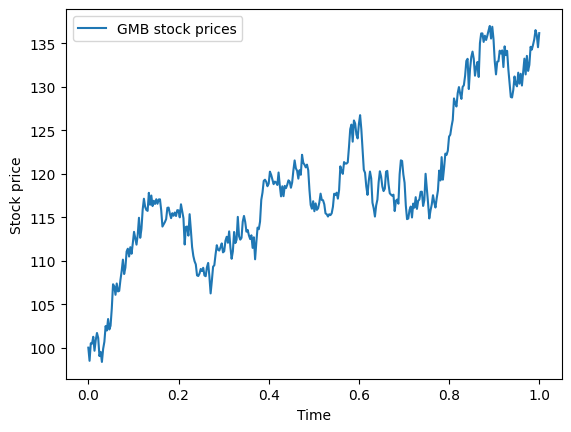

In [3]:
def gbm_using_euler(T, r, S0, sigma_stock, M):
    """
    This function simulates geometric brownian motion using the Euler method and the
    algorithm provided in the appendix C.2.2

    The function returns:
        S = which is the simulated stock prices
        time = which is the timesteps for which we calculate the stock prices
    """

    dt = T / M
    S = np.zeros(M + 1)
    S[0] = S0
    time = np.zeros(M + 1)

    # Go through each time step m and find the current stock price S[m]
    for m in range(1, M + 1):
        Zm = np.random.normal(0, 1) # Sample a random number from a standard normal distribution
        S[m] = S[m - 1] + r * S[m - 1] * dt + sigma_stock * S[m - 1] * np.sqrt(dt) * Zm
        time[m] = m*dt

    return S, time

# Setting the parameter values
T = 1               # The time to maturity = 1 year
K = 99              # Strike price = 99 euros
r = 0.06            # Risk-free interest rate = 6%
S0 = 100            # The current stock price = 100 euros
sigma_stock = 0.2   # Volatility in the stock price = 20%
sigma_delta = 0.2   # The volatility used in the delta computation = 20%
M = 365             # Number of time steps (calculate the new stock price every day of the year)

# Simulate GBM using Euler method
simulated_stock_prices, time = gbm_using_euler(T, r, S0, sigma_stock, M)

# Plot the GBM evolution of stockprices over time
plt.plot(time, simulated_stock_prices, label="GMB stock prices")
plt.xlabel("Time")    
plt.ylabel("Stock price")
plt.legend()
plt.show()


Finding the risk-neutral price of a european call option

In [4]:

def black_scholes_call_price(S, K, r, sigma, T):
    """
    This function calculates the risk-neutral price of a european call option, 
    using Black-Scholes.
    """

    # We want a dynamic hedging strategy??? so need to find a call_price for each timestep?
    # also here, sigma is the stock volatilty right? not yet the delta sigma?
    # does it matter that we consider SHORT position in a European CALL option?

    if T == 0:
        return max(S - K, 0)

    d1 = (np.log(S / K) + (r + (sigma**2)/2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = stats.norm.cdf(d1) # Calculates the cumulative distribution function at d1 of N(0,1)
    N_d2 = stats.norm.cdf(d2)
    call_price = S * N_d1 - K * np.exp(-r * T) * N_d2

    return call_price



Hedging simulation

Final profit/loss: 4.7635359069091905


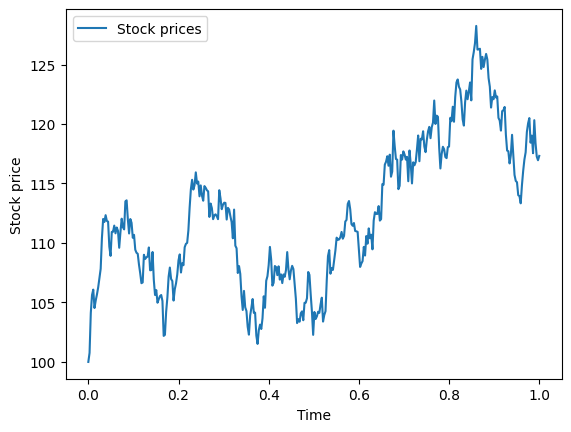

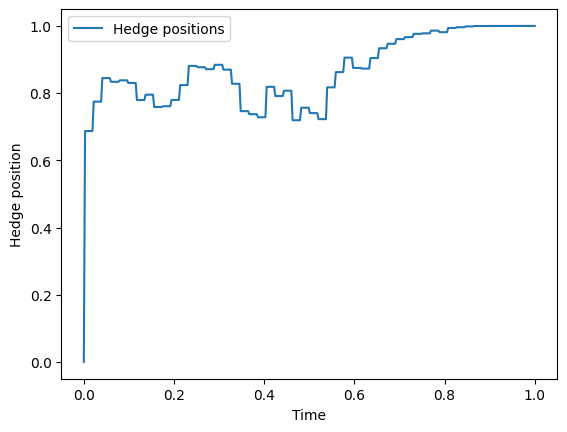

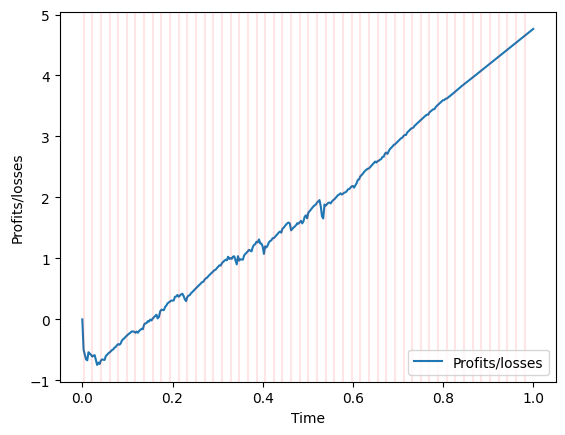

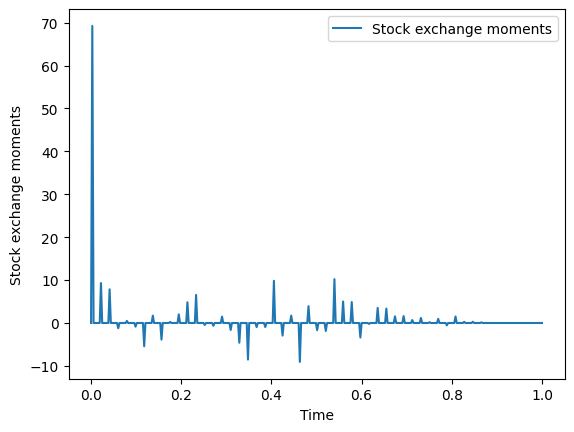

In [5]:
def hedge_simulation(S0, K, r, sigma_stock, sigma_delta, T, M, adjustment_frequency, S=None):
    """
    This function performs a hedging simulation. We want to find how hedging impacts our returns.
    We use the Euler method (the algorithm provided in the appendix C.2.2) to simulate geometric brownian motion.

    The function returns:
        S = which is the simulated stock prices
        time = which is the timesteps for which we calculate the stock prices
        the average profit or loss
    """
    
    dt = T / M

    if S is None:
        S, _ = gbm_using_euler(T, r, S0, sigma_stock, M)

    call_prices = np.zeros(M + 1)
    cash = np.zeros(M + 1)
    time = [m*dt for m in range(M + 1)]

    hedge_positions = np.zeros(M + 1)
    profits_losses = np.zeros(M + 1)
    stock_exchange_moments = np.zeros(M + 1)
    
    # Calculate initial call option price
    call_prices[0] = black_scholes_call_price(S0, K, r, sigma_stock, T)
    
    
    for m in range(1, M + 1):
        # # Go through each time step m and find the current stock price S[m]
        # Zm = np.random.normal(0, 1)
        # S[m] = S[m - 1] * np.exp((r - 0.5 * sigma_stock**2) * dt + sigma_stock * np.sqrt(dt) * Zm)
        # time[m] = m*dt # Store the corresponding price
        
        # Update call option price
        call_prices[m] = black_scholes_call_price(S[m], K, r, sigma_stock, T - m * dt)
        
        # Hedge the position at a frequency delta_frequency
        if (m - 1) % adjustment_frequency == 0 and m != M:
            delta = stats.norm.cdf((np.log(S[m] / K) + (r + 0.5 * sigma_delta**2) * (T - m * dt)) / (sigma_delta * np.sqrt(T - m * dt)))
            hedge_positions[m] = delta

            # Update cash, how much money we have to invest in the stock (or get from selling the stock)
            cash[m] = cash[m - 1] - (delta - hedge_positions[m - 1]) * S[m]

            # Update the stock exchange moments, the moments where we buy or sell stock (and how much)
            stock_exchange_moments[m] = (delta - hedge_positions[m - 1]) * S[m]
        else:
            hedge_positions[m] = hedge_positions[m - 1]
            cash[m] = cash[m - 1]
        
        # Calculate the profit or loss at each time step
        # profits_losses[m] = S[m] - delta * S[m] + call_prices[m] - call_prices[0] * np.exp(r * m * dt)
        profits_losses[m] = S[m] * delta - call_prices[m] + cash[m] + call_prices[0]
        # print(f"Value in stock: {S[m] * delta}, Value in call: {-call_prices[m]}, Cash: {cash[m] + call_prices[0]}")

    return profits_losses, hedge_positions, stock_exchange_moments, time, S


# Setting the parameters
S0 = 100  # Initial stock price
K = 99    # Strike price of the option
r = 0.06  # Risk-free interest rate
sigma_stock = 0.20  # Volatility of the stock
sigma_delta = 0.20 # Volatility used in the delta computation
T = 1     # Time to maturity
M = 365   # Number of time steps (assuming daily steps for one year)
adjustment_frequency = 7  # Frequency of delta adjustment (1 corresponds to daily and 7 to weekly)

# Perform hedging simulation
profits_losses, hedge_positions, stock_exchange_moments, time, S = hedge_simulation(S0, K, r, sigma_stock, sigma_delta, T, M, adjustment_frequency)

# Print average profit/loss
print("Final profit/loss:", profits_losses[-1])

# Plot the stock prices over time
plt.plot(time, S, label="Stock prices")
plt.xlabel("Time")
plt.ylabel("Stock price")
plt.legend()
plt.show()

# Plot the hedge positions over time
plt.plot(time, hedge_positions, label="Hedge positions")
plt.xlabel("Time")
plt.ylabel("Hedge position")
plt.legend()
plt.show()

# Plot the profits/losses over time
plt.plot(time, profits_losses, label="Profits/losses")

# add vertical lines at the stock exchange moments
for i in range(0, len(stock_exchange_moments)):
    if stock_exchange_moments[i] != 0:
        plt.axvline(x=time[i], color='r', linestyle='-', alpha=0.1)

plt.xlabel("Time")
plt.ylabel("Profits/losses")
plt.legend()
plt.show()

# Plot the stock exchange moments over time
plt.plot(time, stock_exchange_moments, label="Stock exchange moments")
plt.xlabel("Time")
plt.ylabel("Stock exchange moments")
plt.legend()
plt.show()




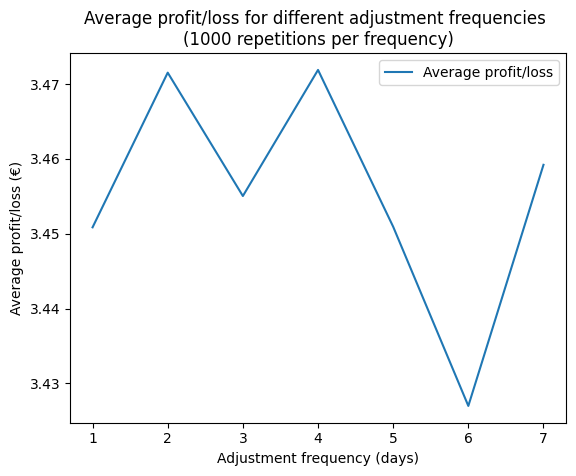

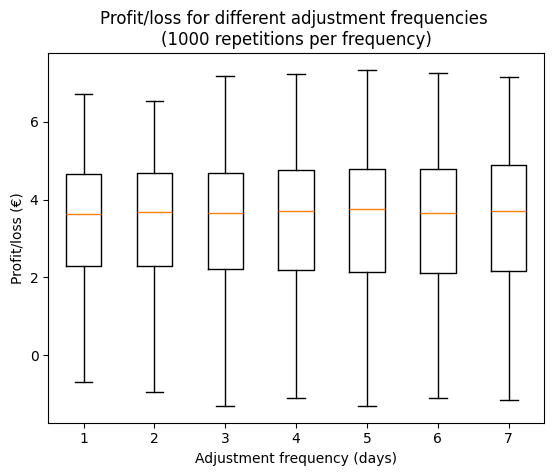

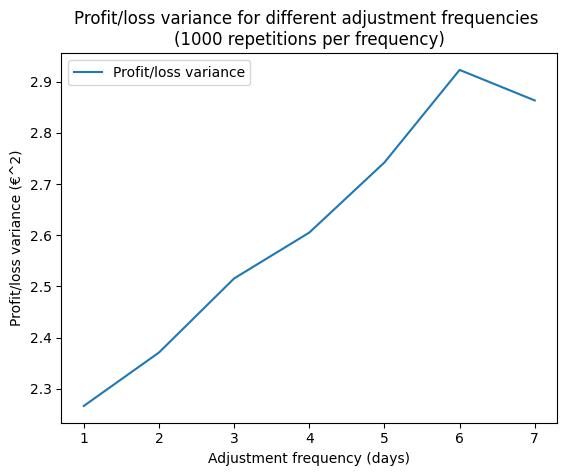

In [6]:
# Setting the parameters
S0 = 100  # Initial stock price
K = 99    # Strike price of the option
r = 0.06  # Risk-free interest rate
sigma_stock = 0.20  # Volatility of the stock
sigma_delta = 0.20  # Volatility used in the delta computation
T = 1     # Time to maturity
M = 365   # Number of time steps (assuming daily steps for one year)
adjustment_frequencies = np.arange(1, 8)
repetitions = 1000

results = {
    adjustment_frequency: np.zeros(repetitions) for adjustment_frequency in adjustment_frequencies
}

for i in range(repetitions):
    # For fair comparison, we simulate the stock prices only once
    S, _ = gbm_using_euler(T, r, S0, sigma_stock, M)

    for adjustment_frequency in adjustment_frequencies:
        profits_losses, _, _, _, _ = hedge_simulation(S0, K, r, sigma_stock, sigma_delta, T, M, adjustment_frequency, S=S)
        results[adjustment_frequency][i] = profits_losses[-1]

# Plot the average profit/loss for each adjustment frequency
average_results = [np.mean(results[i]) for i in adjustment_frequencies]
plt.plot(adjustment_frequencies, average_results, label="Average profit/loss")
plt.xlabel("Adjustment frequency (days)")
plt.ylabel("Average profit/loss (€)")
plt.title(f"Average profit/loss for different adjustment frequencies \n({repetitions} repetitions per frequency)")
plt.legend()
plt.show()

# Plot as a boxplot
plt.boxplot([results[i] for i in adjustment_frequencies], labels=adjustment_frequencies)
plt.xlabel("Adjustment frequency (days)")
plt.ylabel("Profit/loss (€)")
plt.title(f"Profit/loss for different adjustment frequencies \n({repetitions} repetitions per frequency)")
plt.show()

# Plot the profit / loss variance for each adjustment frequency
variance_results = [np.var(results[i]) for i in adjustment_frequencies]
plt.plot(adjustment_frequencies, variance_results, label="Profit/loss variance")
plt.xlabel("Adjustment frequency (days)")
plt.ylabel("Profit/loss variance (€^2)")
plt.title(f"Profit/loss variance for different adjustment frequencies \n({repetitions} repetitions per frequency)")
plt.legend()
plt.show()




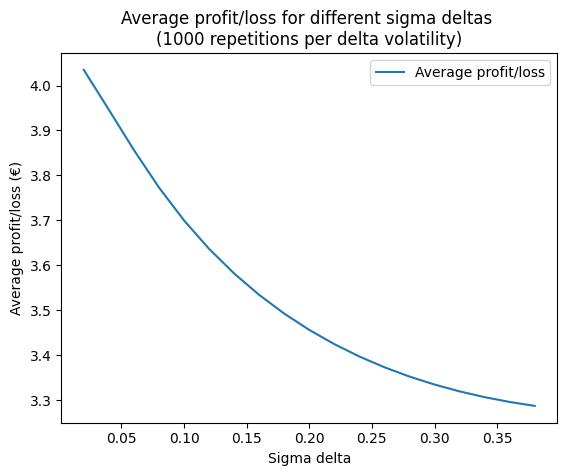

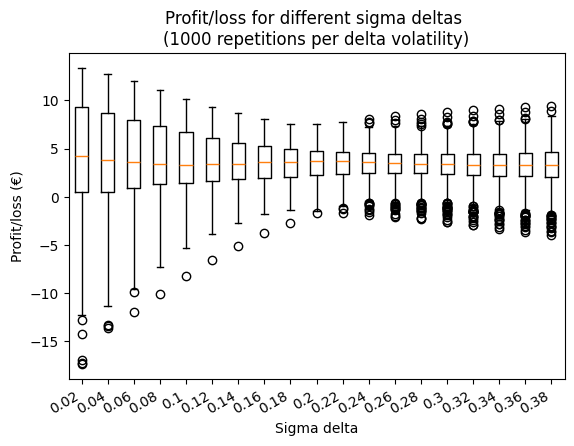

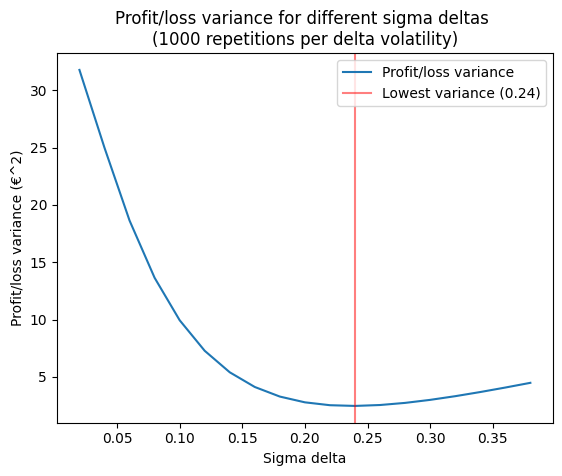

In [35]:
# Setting the parameters
S0 = 100  # Initial stock price
K = 99    # Strike price of the option
r = 0.06  # Risk-free interest rate
sigma_stock = 0.20  # Volatility of the stock

T = 1     # Time to maturity
M = 365   # Number of time steps (assuming daily steps for one year)
adjustment_frequency = 7 # Frequency of delta adjustment (1 corresponds to daily and 7 to weekly)

sigma_deltas = np.arange(0.02, 0.4, 0.02)
repetitions = 1000

results = {
    sigma_delta: np.zeros(repetitions) for sigma_delta in sigma_deltas
}

for i in range(repetitions):
    # For fair comparison, we simulate the stock prices only once
    S, _ = gbm_using_euler(T, r, S0, sigma_stock, M)

    for sigma_delta in sigma_deltas:
        profits_losses, _, _, _, _ = hedge_simulation(S0, K, r, sigma_stock, sigma_delta, T, M, adjustment_frequency, S=S)
        results[sigma_delta][i] = profits_losses[-1]

# Plot the average profit/loss for each sigma delta
average_results = [np.mean(results[i]) for i in sigma_deltas]
plt.plot(sigma_deltas, average_results, label="Average profit/loss")
plt.xlabel("Sigma delta")
plt.ylabel("Average profit/loss (€)")
plt.title(f"Average profit/loss for different sigma deltas \n({repetitions} repetitions per delta volatility)")
plt.legend()
plt.show()

# Plot as a boxplot
fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.boxplot([results[i] for i in sigma_deltas], labels=[round(sigma_delta, 2) for sigma_delta in sigma_deltas])
plt.xlabel("Sigma delta")
plt.ylabel("Profit/loss (€)")
plt.title(f"Profit/loss for different sigma deltas \n({repetitions} repetitions per delta volatility)")
plt.show()

# Plot the profit / loss variance for each sigma delta
variance_results = [np.var(results[i]) for i in sigma_deltas]
plt.plot(sigma_deltas, variance_results, label="Profit/loss variance")

# add vertical line at lowest value
min_variance = min(variance_results)
min_variance_index = variance_results.index(min_variance)
plt.axvline(x=sigma_deltas[min_variance_index], color='r', linestyle='-', alpha=0.5, label=f"Lowest variance ({round(sigma_deltas[min_variance_index], 2)})")

plt.xlabel("Sigma delta")
plt.ylabel("Profit/loss variance (€^2)")
plt.title(f"Profit/loss variance for different sigma deltas \n({repetitions} repetitions per delta volatility)")
plt.legend()
plt.show()

# # Now use percentage difference between sigmas as x-axis (rounded to 2 decimals)
# percentage_difference = [round((sigma_deltas[i] - sigma_stock) / sigma_stock, 2) for i in range(len(sigma_deltas))]
# plt.plot(percentage_difference, average_results, label="Average profit/loss")
# plt.xlabel("Percentage difference between sigma deltas")
# plt.ylabel("Average profit/loss (€)")
# plt.title(f"Average profit/loss for different percentage differences between sigma deltas \n({repetitions} repetitions per percentage difference)")
# plt.legend()
# plt.show()

# # Plot as a boxplot
# fig, ax = plt.subplots()
# fig.autofmt_xdate()
# plt.boxplot([results[i] for i in sigma_deltas], labels=percentage_difference)
# plt.xlabel("Percentage difference between sigma deltas")
# plt.ylabel("Profit/loss (€)")
# plt.title(f"Profit/loss for different percentage differences between sigma deltas \n({repetitions} repetitions per percentage difference)")
# plt.show()

# # Plot the profit / loss variance for each percentage difference
# variance_results = [np.var(results[i]) for i in sigma_deltas]
# plt.plot(percentage_difference, variance_results, label="Profit/loss variance")
# plt.xlabel("Percentage difference between sigma deltas")
# plt.ylabel("Profit/loss variance (€^2)")
# plt.title(f"Profit/loss variance for different percentage differences between sigma deltas \n({repetitions} repetitions per percentage difference)")
# plt.legend()
# plt.show()



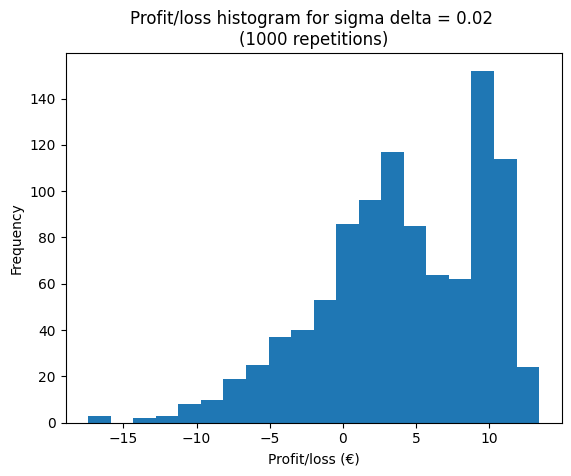

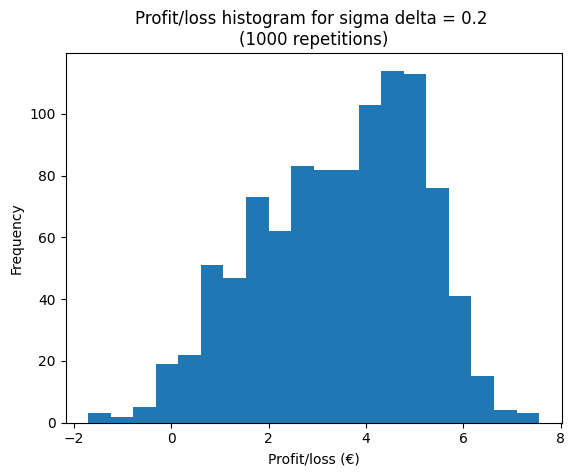

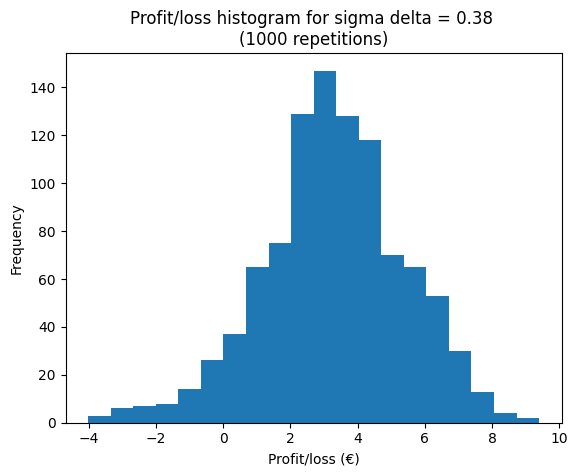

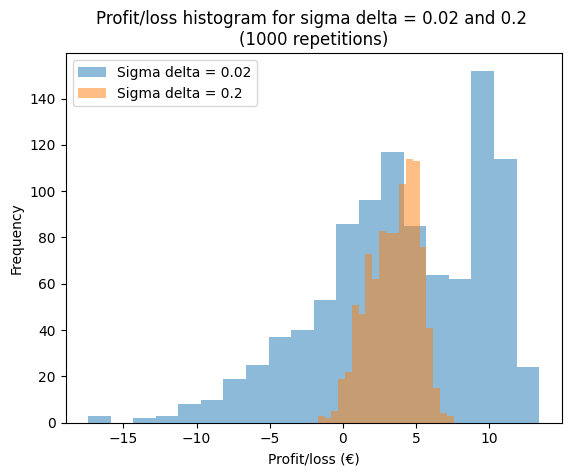

In [38]:
# take the results for the lowest sigma_delta value and plot histogram
plt.hist(results[sigma_deltas[0]], bins=20)
plt.xlabel("Profit/loss (€)")
plt.ylabel("Frequency")
plt.title(f"Profit/loss histogram for sigma delta = {sigma_deltas[0]} \n({repetitions} repetitions)")
plt.show()

# Against 0.2
value = sigma_deltas[9]
plt.hist(results[value], bins=20)
plt.xlabel("Profit/loss (€)")
plt.ylabel("Frequency")
plt.title(f"Profit/loss histogram for sigma delta = {round(value, 2)} \n({repetitions} repetitions)")
plt.show()

# And for the higehst value
plt.hist(results[sigma_deltas[-1]], bins=20)
plt.xlabel("Profit/loss (€)")
plt.ylabel("Frequency")
plt.title(f"Profit/loss histogram for sigma delta = {sigma_deltas[-1]} \n({repetitions} repetitions)")
plt.show()

# Now both histograms in one plot
plt.hist(results[sigma_deltas[0]], bins=20, alpha=0.5, label=f"Sigma delta = {sigma_deltas[0]}")
plt.hist(results[value], bins=20, alpha=0.5, label=f"Sigma delta = {round(value, 2)}")
# plt.hist(results[sigma_deltas[-1]], bins=20, alpha=0.5, label=f"Sigma delta = {sigma_deltas[-1]}")
plt.xlabel("Profit/loss (€)")
plt.ylabel("Frequency")
plt.title(f"Profit/loss histogram for sigma delta = {sigma_deltas[0]} and {round(value, 2)} \n({repetitions} repetitions)")
plt.legend()
plt.show()
